# User input

In [1]:
start_year_past = 2021
stop_year_past = 2040
start_year_future = 2041
stop_year_future = 2060

# Import packages

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_presentation_seaborn.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = Year
C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_presentation_seaborn.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = Month
C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_presentation_seaborn.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

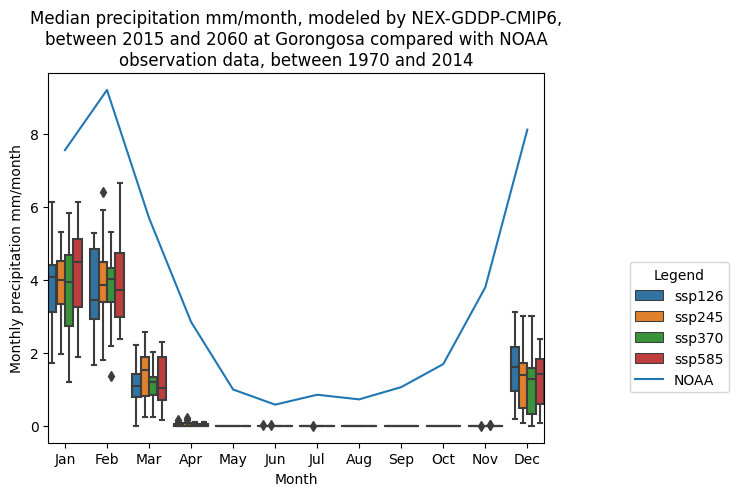

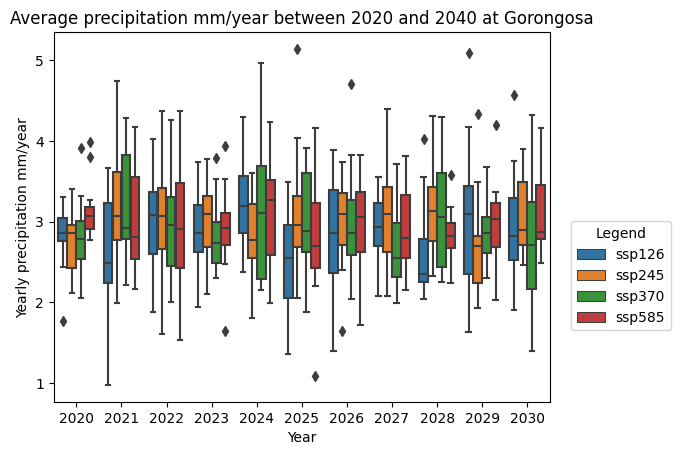

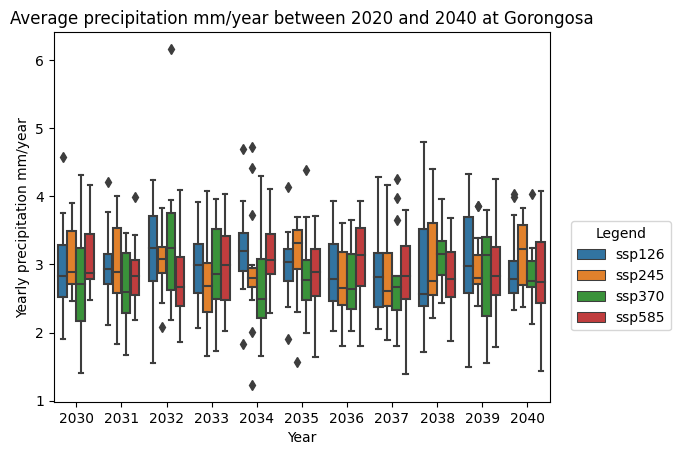

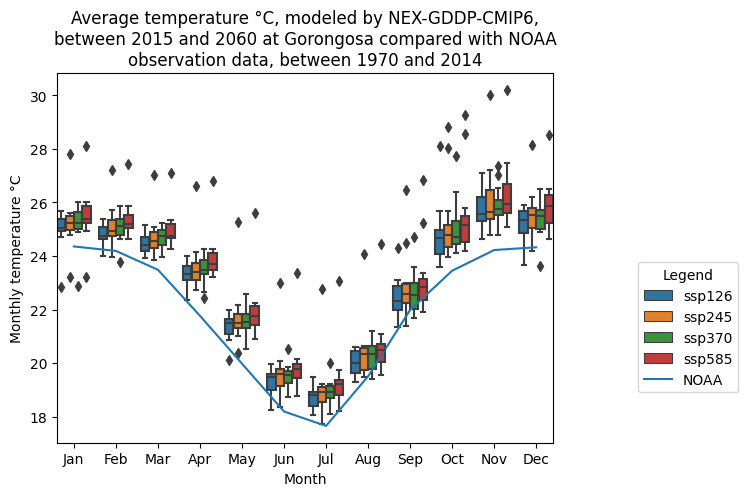

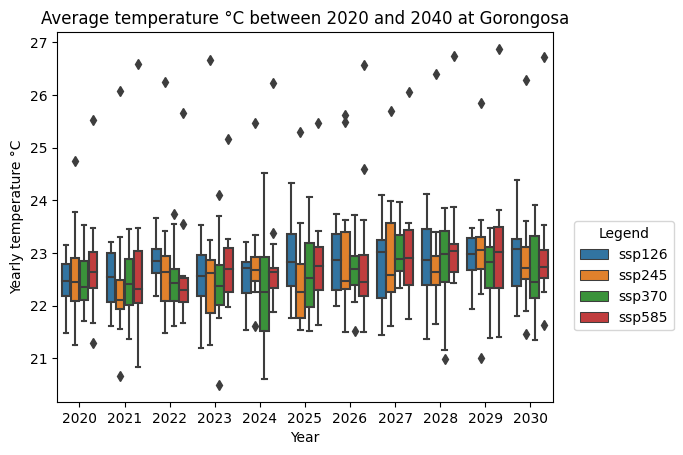

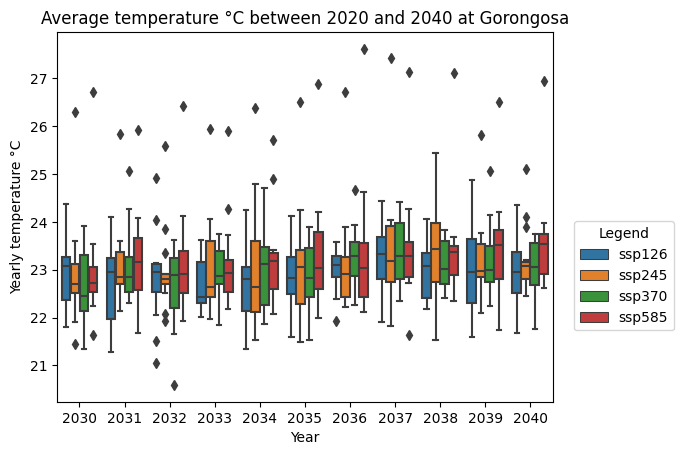

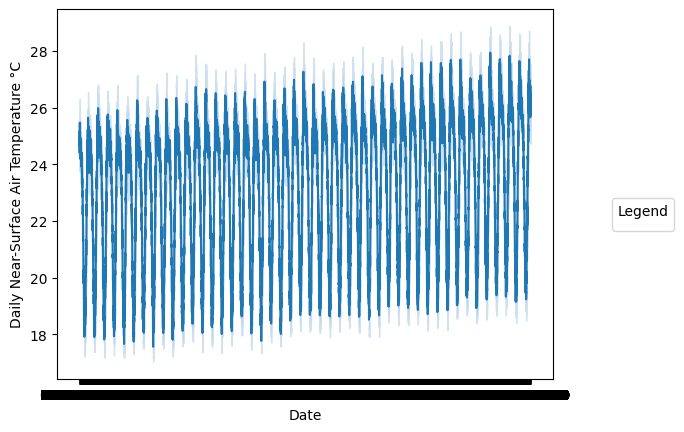

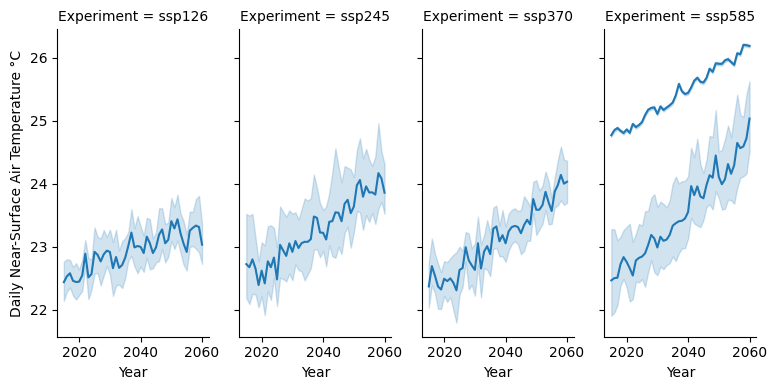

In [99]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gumbel_r
from scipy.stats import gumbel_l
import os
import os.path
import math
import seaborn as sns

from Functions_Indicators import add_year_month_season
from Graphs_presentation_seaborn import trends_year

# Import data

## Temperature

In [3]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz'
csv_path = os.path.join(out_path,'csv_file','tas','tas_Celsius_day_1950-2100','tas_1950-2100_projectsMoz_wrong_emplacement.csv')
tas_clim_var = pd.read_csv(csv_path,header=[0],index_col=[0,1,2,3,4])

In [4]:
tas_clim_var

Date  \
Name project  Experiment Model      Latitude Longitude               
WTP_Mutua_EIB historical ACCESS-CM2 -19.375  34.625     01-01-1950   
                                             34.625     02-01-1950   
                                             34.625     03-01-1950   
                                             34.625     04-01-1950   
                                             34.625     05-01-1950   
...                                                            ...   
Pemba_EIB     ssp370     TaiESM1    -12.375  40.625     27-12-2100   
                                             40.625     28-12-2100   
                                             40.625     29-12-2100   
                                             40.625     30-12-2100   
                                             40.625     31-12-2100   

                                                        Daily Near-Surface Air Temperature °C  
Name project  Experiment Model      Latitude Longitude                                         
WTP_Mutua_EIB historical ACCESS-CM2 -19.375  34.625                                 30.038757  
                                             34.625                                 30.407043  
                                             34.625                                 30.592712  
                                             34.625                                 31.287659  
                                             34.625                                 25.517853  
...                                                                                       ...  
Pemba_EIB     ssp370     TaiESM1    -12.375  40.625                                 35.229156  
                                             40.625                                 34.882050  
                                             40.625                                 34.760345  
                                             40.625                                 33.659302  
                                             40.625                                 34.273346  

[8963100 rows x 2 columns]

In [31]:
tas_clim_var_without_index = tas_clim_var.reset_index()
tas_clim_var_without_index_gorongosa = tas_clim_var_without_index[tas_clim_var_without_index['Name project']=='Gorongosa_EIB']
tas_clim_var_without_index_gorongosa=add_year_month_season(tas_clim_var_without_index_gorongosa,'Date')

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Functions_Indicators.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = Year
C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Functions_Indicators.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = Month
C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Functions_Indicators.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [32]:
tas_clim_var_without_index_gorongosa=tas_clim_var_without_index_gorongosa.drop(['Name project','Latitude','Longitude'],axis=1)

In [33]:
tas_clim_var_without_index_gorongosa

,Experiment,Model,Date,Daily Near-Surface Air Temperature °C,Year,Month,Season
2240775,historical,ACCESS-CM2,01-01-1950,27.586426,1950,Jan,Humid
2240776,historical,ACCESS-CM2,02-01-1950,27.308807,1950,Jan,Humid
2240777,historical,ACCESS-CM2,03-01-1950,27.221954,1950,Jan,Humid
2240778,historical,ACCESS-CM2,04-01-1950,27.884003,1950,Jan,Humid
2240779,historical,ACCESS-CM2,05-01-1950,23.180817,1950,Jan,Humid
...,...,...,...,...,...,...,...
4481545,ssp370,TaiESM1,27-12-2100,19.087311,2100,Dec,Humid
4481546,ssp370,TaiESM1,28-12-2100,27.161072,2100,Dec,Humid
4481547,ssp370,TaiESM1,29-12-2100,27.737091,2100,Dec,Humid
4481548,ssp370,TaiESM1,30-12-2100,16.855804,2100,Dec,Humid


In [58]:
tas_clim_var_without_index_gorongosa[tas_clim_var_without_index_gorongosa['Daily Near-Surface Air Temperature °C']>40].groupby(['Experiment','Model','Year']).count()

Date  Daily Near-Surface Air Temperature °C  \
Experiment Model        Year                                                
historical CMCC-CM2-SR5 1987     2                                      2   
           TaiESM1      2000     1                                      1   
ssp126     TaiESM1      2022     5                                      5   
                        2026     1                                      1   
                        2027     1                                      1   
...                            ...                                    ...   
ssp585     TaiESM1      2096    12                                     12   
                        2097    11                                     11   
                        2098    16                                     16   
                        2099    19                                     19   
                        2100    14                                     14   

                              Month  Season  
Experiment Model        Year                 
historical CMCC-CM2-SR5 1987      2       2  
           TaiESM1      2000      1       1  
ssp126     TaiESM1      2022      5       5  
                        2026      1       1  
                        2027      1       1  
...                             ...     ...  
ssp585     TaiESM1      2096     12      12  
                        2097     11      11  
                        2098     16      16  
                        2099     19      19  
                        2100     14      14  

[269 rows x 4 columns]

## Incremental air temperature change

In [ ]:
#from Functions_Indicators import yearly_avg

In [39]:
def yearly_avg(df,title_column,climate_var_longName):
    df_yearly_avg = df.copy(deep =True)
    df_yearly_avg=df_yearly_avg.drop(['Date','Month','Season'],axis=1)
    try:
        try:
            old_title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            old_title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        old_title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
    df_yearly_avg=df_yearly_avg.rename(columns={old_title_column:'Yearly average '+climate_var_longName})
    df_yearly_avg = df_yearly_avg.groupby(['Experiment','Model','Year']).mean() # .sum() for precipitaitonsum per year
    #df_yearly_avg = df_yearly_avg.groupby(['Name project','Experiment','Model']).mean()
    return df_yearly_avg

In [40]:
tas_yearly_avg=yearly_avg(tas_clim_var_without_index_gorongosa,'Daily Near-Surface Air Temperature °C','temperature')
tas_yearly_avg

Yearly average temperature
Experiment Model      Year                            
historical ACCESS-CM2 1950                   21.878193
                      1951                   21.214108
                      1952                   21.676567
                      1953                   21.110851
                      1954                   21.129586
...                                                ...
ssp585     TaiESM1    2096                   29.698982
                      2097                   28.324014
                      2098                   28.343303
                      2099                   31.375321
                      2100                   31.030001

[6135 rows x 1 columns]

<Axes: xlabel='Year', ylabel='Yearly average temperature'>

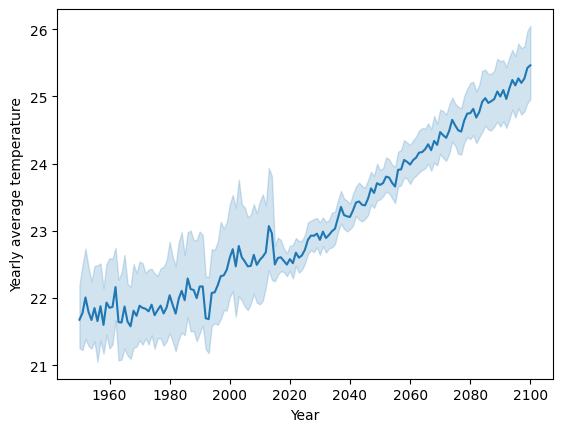

In [90]:
sns.lineplot(tas_yearly_avg,x='Year',y='Yearly average temperature')

In [ ]:
tas_yearly_avg=tas_yearly_avg.reset_index()

<Axes: xlabel='Year', ylabel='Yearly average temperature'>

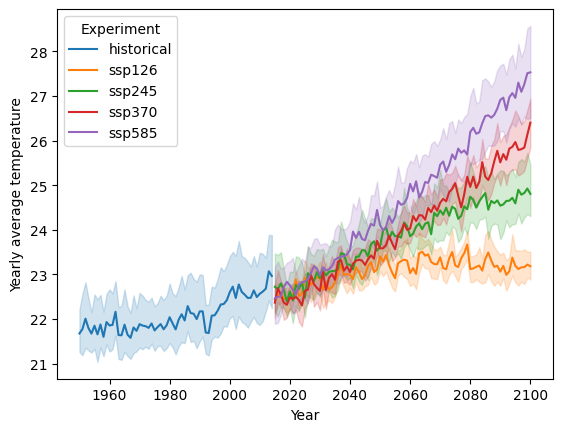

In [93]:
sns.lineplot(tas_yearly_avg,x='Year',y='Yearly average temperature',hue='Experiment')

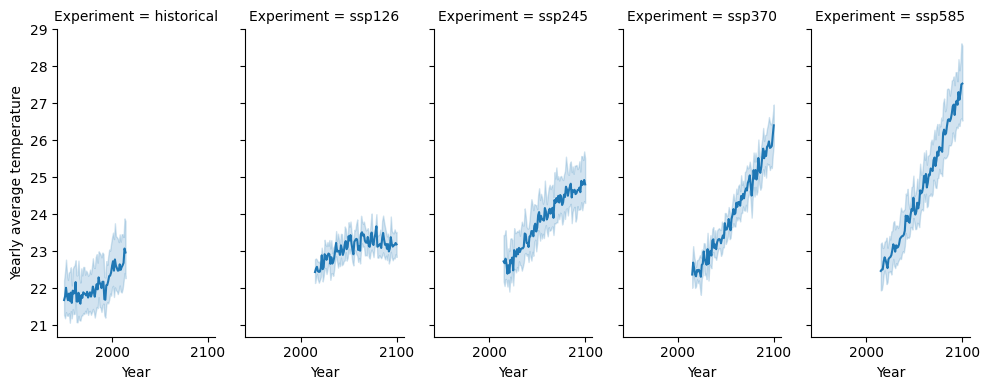

In [92]:
g = sns.FacetGrid(tas_yearly_avg, col="Experiment", height=4, aspect=.5)
g.map(sns.lineplot, "Year",'Yearly average temperature')

## Average annual number of days with temperatures above 40 degress

In [67]:
def number_day_above_threshold(df,climate_var_longName,threshold):
    try:
        try:
            old_title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            old_title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        old_title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
    new_name='Average annual number of days with '+climate_var_longName+' above '+str(threshold)
    df = df.rename(columns={old_title_column:new_name})
    
    df = df.drop(['Date','Month','Season'],axis=1)
    
    df=df[df[new_name]>40].groupby(['Experiment','Model','Year']).count()    
    
    return df

In [68]:
max_tas_over_40 = number_day_above_threshold(tas_clim_var_without_index_gorongosa,'temperature',40)
max_tas_over_40

Average annual number of days with temperature above 40
Experiment Model        Year                                                         
historical CMCC-CM2-SR5 1987                                                  2      
           TaiESM1      2000                                                  1      
ssp126     TaiESM1      2022                                                  5      
                        2026                                                  1      
                        2027                                                  1      
...                                                                         ...      
ssp585     TaiESM1      2096                                                 12      
                        2097                                                 11      
                        2098                                                 16      
                        2099                                                 19      
                        2100                                                 14      

[269 rows x 1 columns]

<Axes: xlabel='Year', ylabel='Average annual number of days with temperature above 40'>

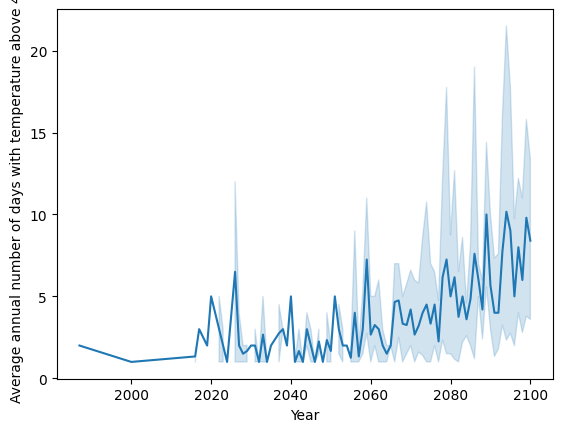

In [73]:
sns.lineplot(max_tas_over_40,x='Year',y='Average annual number of days with temperature above 40')

In [ ]:
max_tas_over_40=max_tas_over_40.reset_index()

<Axes: xlabel='Year', ylabel='Average annual number of days with temperature above 40'>

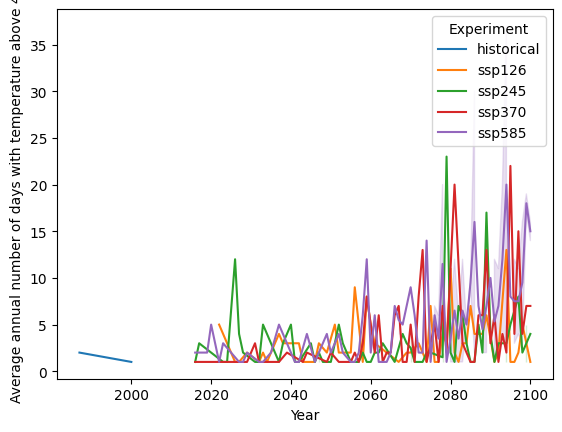

In [94]:
sns.lineplot(max_tas_over_40,x='Year',y='Average annual number of days with temperature above 40',hue='Experiment')

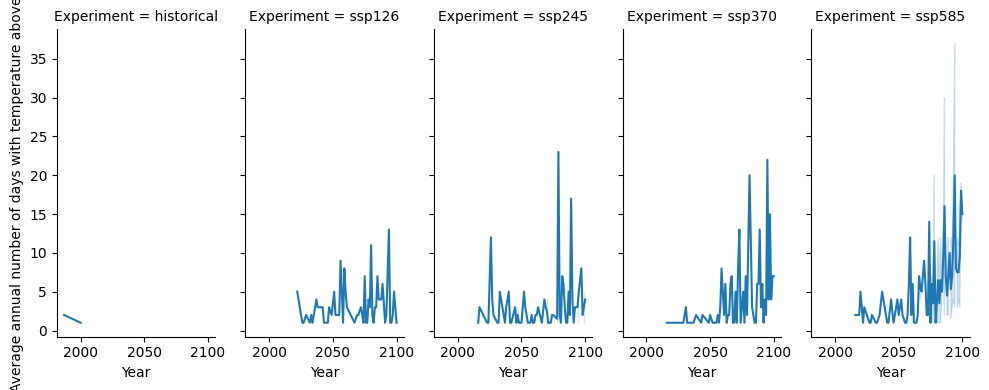

In [86]:
g = sns.FacetGrid(max_tas_over_40, col="Experiment", height=4, aspect=.5)
g.map(sns.lineplot, "Year",'Average annual number of days with temperature above 40')

## Maximum temperature in year

In [50]:
def max_per_year_for_each_model_ssp(df,climate_var_longName):
    try:
        try:
            old_title_column=df.filter(like=climate_var_longName, axis=1).columns[0]
        except:
            old_title_column=df.filter(like=climate_var_longName.capitalize(), axis=1).columns[0]
    except:
        old_title_column=df.filter(like=climate_var_longName.upper(), axis=1).columns[0]
    df = df.rename(columns={old_title_column:'Yearly maximum '+climate_var_longName})
    df = df.drop(['Date','Month','Season'],axis=1)
    df = df.groupby(['Experiment','Model','Year']).max()
    return df

In [51]:
df=max_per_year_for_each_model_ssp(tas_clim_var_without_index_gorongosa,'temperature')

In [52]:
df

Yearly maximum temperature
Experiment Model      Year                            
historical ACCESS-CM2 1950                   28.410614
                      1951                   27.240509
                      1952                   29.647430
                      1953                   28.129730
                      1954                   26.786530
...                                                ...
ssp585     TaiESM1    2096                   46.751373
                      2097                   41.653290
                      2098                   49.549408
                      2099                   48.153290
                      2100                   47.525024

[6135 rows x 1 columns]

<Axes: xlabel='Year', ylabel='Yearly maximum temperature'>

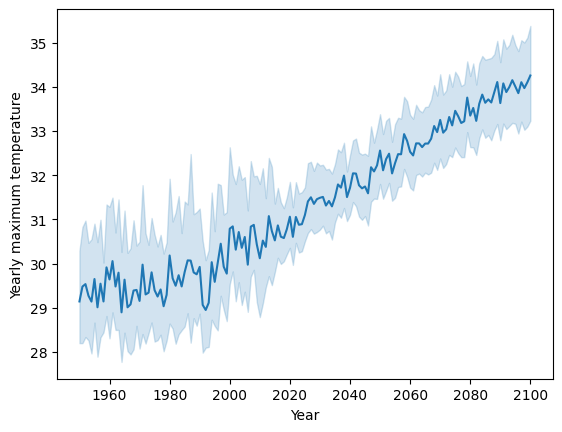

In [75]:
sns.lineplot(df,x='Year',y='Yearly maximum temperature')

In [ ]:
df=df.reset_index()

<Axes: xlabel='Year', ylabel='Yearly maximum temperature'>

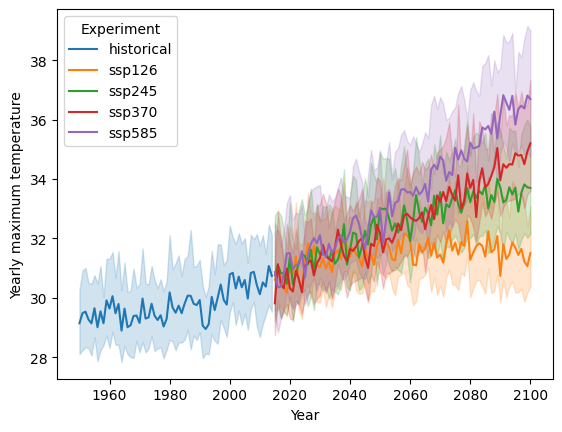

In [95]:
sns.lineplot(df,x='Year',y='Yearly maximum temperature',hue='Experiment')

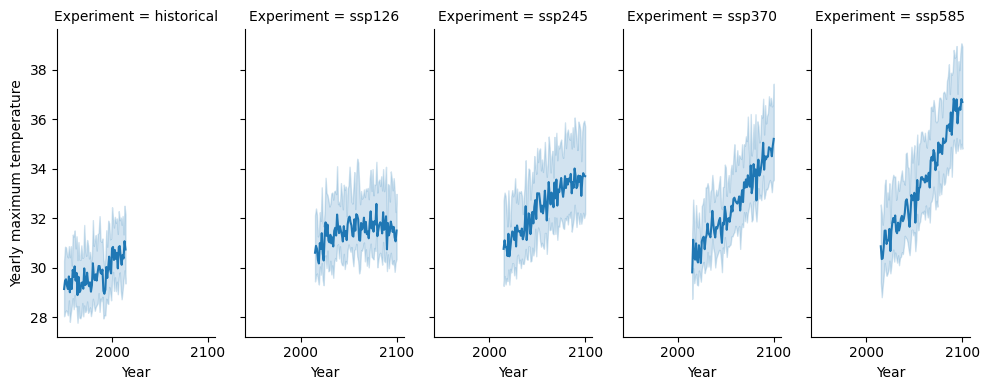

In [82]:
g = sns.FacetGrid(df, col="Experiment", height=4, aspect=.5)
g.map(sns.lineplot, "Year",'Yearly maximum temperature')

In [100]:
trends_year('tas',df,'NEX-GDDP-CMIP6','mean','gorongosa',1960,2100)

UnboundLocalError: local variable 'data_NEXGDDPCMIP6' referenced before assignment